In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('merge_data_2018_2022.csv')

In [128]:
df.head()

,Unnamed: 0,index,CFLATS_UNIT..RTLMP.,HB_NORTH..RTLMP.,WAKEWE_ALL..RTLMP.,CFLATS_UNIT..DALMP.,HB_NORTH..DALMP.,WAKEWE_ALL..DALMP.,DATETIME,ERCOT..LOAD_FORECAST.,...,Panhandle..ERCOT_DA_GENERIC_CONSTRAINTS.,WAKEWE_ALL..DARTLMP.,TYLRWIND_RN..DARTLMP.,West.Texas.Export..ERCOT_DA_GENERIC_CONSTRAINTS.,ERCOT..SOLAR_PVGRPP.,HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,1,1,NaN,27.5950,27.6375,NaN,27.23,27.36,01/01/2018 01:00:00,49367.877441,...,3083.0,0.2775,0.3675,NaN,0.0,1,01/01/2018,OFFPEAK,JANUARY,2018
1,2,2,NaN,27.6900,27.7000,NaN,25.55,25.69,01/01/2018 02:00:00,48668.364014,...,2962.0,2.0100,2.1250,NaN,0.0,2,01/01/2018,OFFPEAK,JANUARY,2018
2,3,3,NaN,27.4825,27.4400,NaN,25.72,25.89,01/01/2018 03:00:00,48351.732544,...,2961.0,1.5500,1.7300,NaN,0.0,3,01/01/2018,OFFPEAK,JANUARY,2018
3,4,4,NaN,27.9425,27.9575,NaN,26.75,26.92,01/01/2018 04:00:00,48621.932007,...,2961.0,1.0375,1.1675,NaN,0.0,4,01/01/2018,OFFPEAK,JANUARY,2018
4,5,5,NaN,28.7875,28.8075,NaN,28.11,28.27,01/01/2018 05:00:00,49914.561890,...,2960.0,0.5375,0.6625,NaN,0.0,5,01/01/2018,OFFPEAK,JANUARY,2018


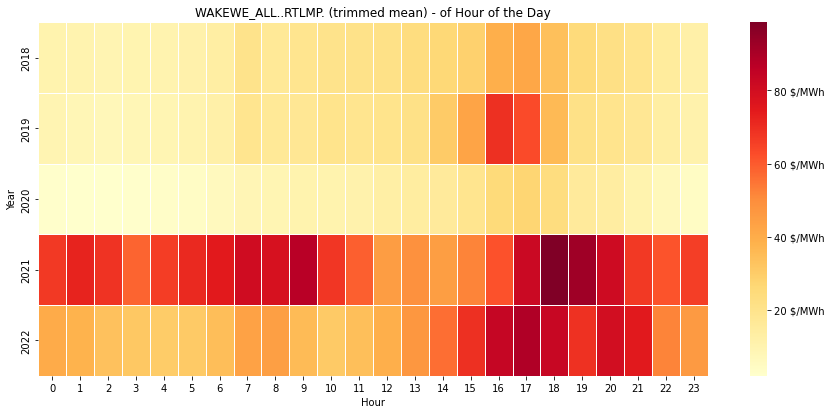

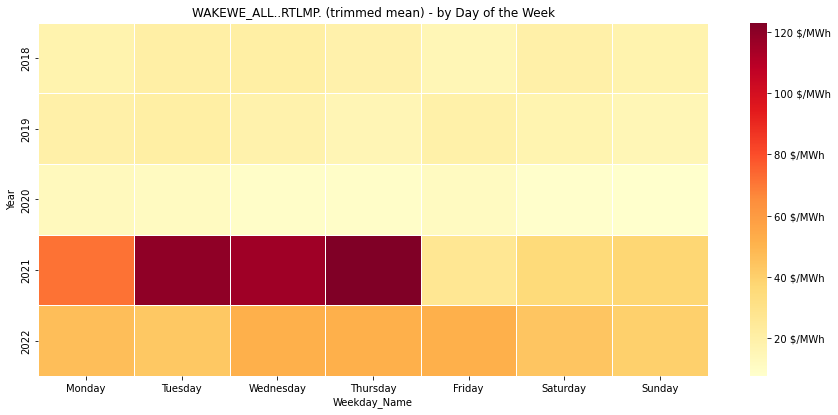

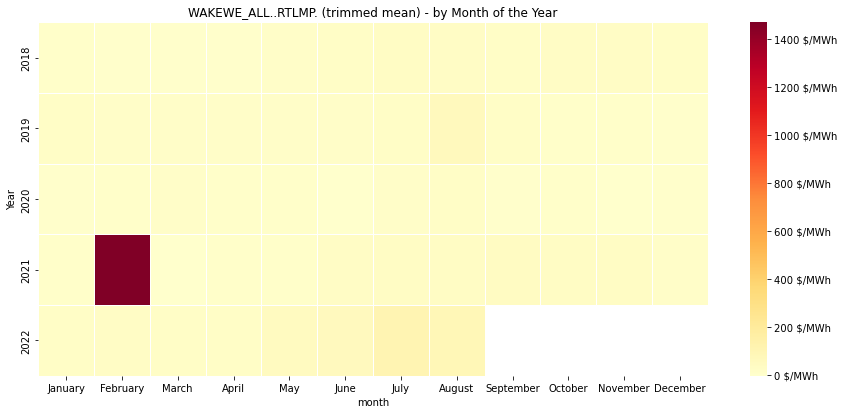

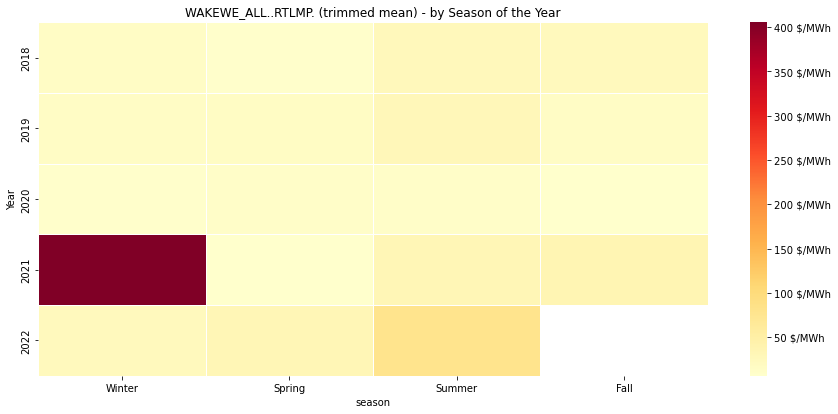

In [56]:
df = pd.read_csv('merge_data_2018_2022.csv')
from scipy import stats
#stats.trim_mean(data, 0.1)
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
heatmap_data = df[['WAKEWE_ALL..RTLMP.']].copy()


# First we need to add weekdays as a column
heatmap_data['Hour'] = df.index.hour

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data=heatmap_data.groupby(['Year', 'Hour']).apply(lambda x: stats.trim_mean(x, 0.01)[0])
heatmap_data = heatmap_data.reset_index()
heatmap_data['WAKEWE_ALL..RTLMP.'] = heatmap_data[0]
# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Hour', values='WAKEWE_ALL..RTLMP.')


fig, ax = plt.subplots(figsize=(15, 6.5))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('WAKEWE_ALL..RTLMP. (trimmed mean) - of Hour of the Day')


df = pd.read_csv('merge_data_2018_2022.csv')
from scipy import stats
#stats.trim_mean(data, 0.1)
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
heatmap_data = df[['WAKEWE_ALL..RTLMP.']].copy()


# First we need to add weekdays as a column
heatmap_data['Weekday_Name'] = df.index.day_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data=heatmap_data.groupby(['Year', 'Weekday_Name']).apply(lambda x: stats.trim_mean(x, 0.01)[0])
heatmap_data = heatmap_data.reset_index()
heatmap_data['WAKEWE_ALL..RTLMP.'] = heatmap_data[0]
# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Weekday_Name', values='WAKEWE_ALL..RTLMP.')

# Reorder columns
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

fig, ax = plt.subplots(figsize=(15, 6.5))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('WAKEWE_ALL..RTLMP. (trimmed mean) - by Day of the Week')



df = pd.read_csv('merge_data_2018_2022.csv')
from scipy import stats
#stats.trim_mean(data, 0.1)
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
heatmap_data = df[['WAKEWE_ALL..RTLMP.']].copy()


# First we need to add weekdays as a column
heatmap_data['month'] = df.index.month_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data=heatmap_data.groupby(['Year', 'month']).apply(lambda x: stats.trim_mean(x, 0.01)[0])
heatmap_data = heatmap_data.reset_index()
heatmap_data['WAKEWE_ALL..RTLMP.'] = heatmap_data[0]
# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='month', values='WAKEWE_ALL..RTLMP.')

# Reorder columns
heatmap_data = heatmap_data[['January', 'February', 'March', 'April', 'May', 'June', 'July',
                            'August','September','October', 'November','December']]
fig, ax = plt.subplots(figsize=(15, 6.5))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('WAKEWE_ALL..RTLMP. (trimmed mean) - by Month of the Year')


df = pd.read_csv('merge_data_2018_2022.csv')
from scipy import stats
#stats.trim_mean(data, 0.1)
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
heatmap_data = df[['WAKEWE_ALL..RTLMP.']].copy()

mlist = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
slist = ['Winter', 'Spring', 'Summer', 'Fall']
sdict = {k: v for v, ks in zip(slist, mlist) for k in ks}
heatmap_data['season']=df.index.month.map(sdict.get)
# First we need to add weekdays as a column
#heatmap_data['month'] = df.index.month_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data=heatmap_data.groupby(['Year', 'season']).apply(lambda x: stats.trim_mean(x, 0.01)[0])
heatmap_data = heatmap_data.reset_index()
heatmap_data['WAKEWE_ALL..RTLMP.'] = heatmap_data[0]
# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='season', values='WAKEWE_ALL..RTLMP.')

# Reorder columns
heatmap_data = heatmap_data[['Winter', 'Spring', 'Summer', 'Fall']]
fig, ax = plt.subplots(figsize=(15, 6.5))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('WAKEWE_ALL..RTLMP. (trimmed mean) - by Season of the Year')




plt.show()

## Plot of 'ERCOT..SOLAR_PVGRPP. vs West.Texas.Export..ERCOT_DA_GENERIC_CONSTRAINTS.'

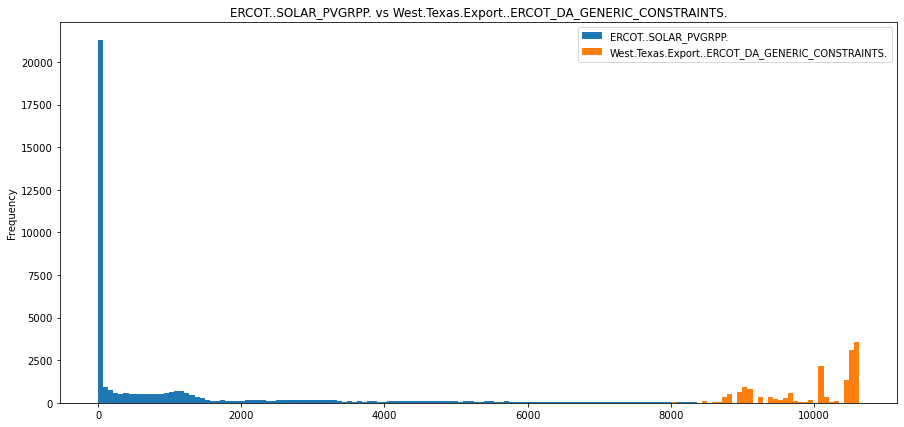

In [58]:
df[['ERCOT..SOLAR_PVGRPP.', 'West.Texas.Export..ERCOT_DA_GENERIC_CONSTRAINTS.']].plot.hist(figsize=(15, 7), 
                                bins=150, title='ERCOT..SOLAR_PVGRPP. vs West.Texas.Export..ERCOT_DA_GENERIC_CONSTRAINTS.')
plt.show()

## Plot of Actual ERCOT Load vs Forecasted Load

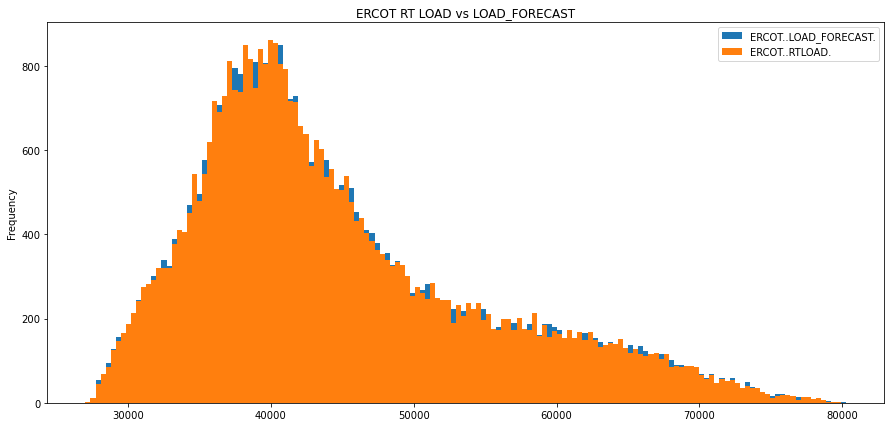

In [167]:

ax = df[['ERCOT..LOAD_FORECAST.', 'ERCOT..RTLOAD.']].plot.hist(figsize=(15, 7), 
                                                                bins=150, title='ERCOT RT LOAD vs LOAD_FORECAST')
plt.show()

## Plot of 'ERCOT RT LOAD vs HB_NORTH_RTLMP vs CFLATS_RTLMP vs WAKEWE_ALL_RTLMP'

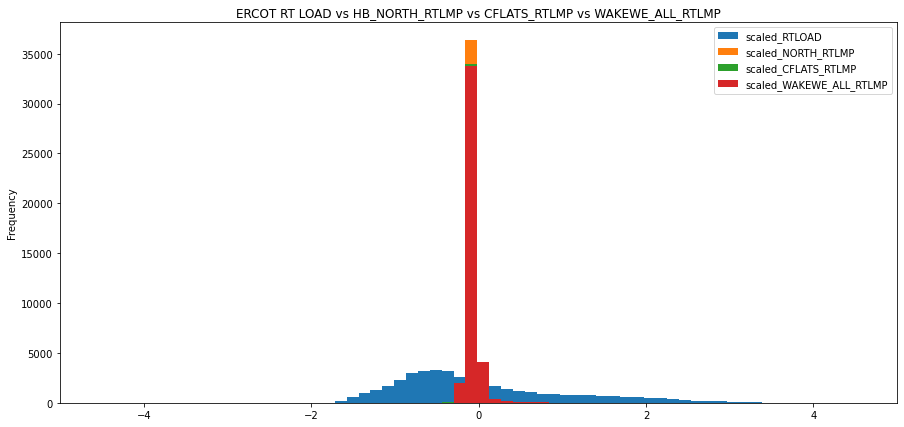

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['scaled_RTLOAD'] = scaler.fit_transform(df[['ERCOT..RTLOAD.']])
df['scaled_NORTH_RTLMP'] = scaler.fit_transform(df[['HB_NORTH..RTLMP.']])
df['scaled_CFLATS_RTLMP'] = scaler.fit_transform(df[['CFLATS_UNIT..RTLMP.']])
df['scaled_WAKEWE_ALL_RTLMP'] = scaler.fit_transform(df[['WAKEWE_ALL..RTLMP.']])

ax = df[['scaled_RTLOAD', 'scaled_NORTH_RTLMP','scaled_CFLATS_RTLMP', 'scaled_WAKEWE_ALL_RTLMP' ]].plot.hist(figsize=(15, 7)
         ,bins=150, title='ERCOT RT LOAD vs HB_NORTH_RTLMP vs CFLATS_RTLMP vs WAKEWE_ALL_RTLMP')
ax.set_xlim((-5, 5))
plt.show()

## Some Feature Engineering

In [129]:
df = pd.read_csv('merge_data_2018_2022.csv')
df1 = df.loc[df['YEAR'].isin([2018, 2019, 2020,2021,2022]), ['DATETIME', 'PEAKTYPE', 'ERCOT..RTLOAD.',
                                             'ERCOT..WINDDATA.', 'GR_PANHANDLE..WINDDATA.', 'GR_WEST..WINDDATA.',
                                            'CFLATS_UNIT..RTLMP.', 'HB_NORTH..RTLMP.','WAKEWE_ALL..RTLMP.',
                                             'ERCOT..SOLAR_PVGRPP.', 'ERCOT..LOAD_FORECAST.']]

#Additional Features
df1 = df1.set_index('DATETIME')
df1.index = pd.to_datetime(df1.index)
df1['month'] = df1.index.month_name()
df1['quarter'] = df1.index.quarter
df1['hour'] = df1.index.hour
df1['weekday'] = df1.index.day_name()
df2 = df1.copy()

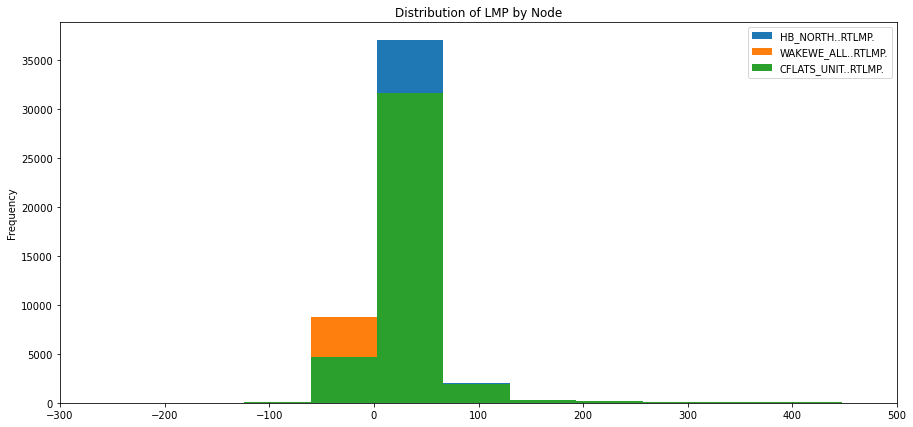

In [62]:

ax = df2[['HB_NORTH..RTLMP.', 'WAKEWE_ALL..RTLMP.', 'CFLATS_UNIT..RTLMP.']].plot.hist(figsize=(15, 7), 
                                                                bins=150, title='Distribution of LMP by Node')
ax.set_xlim((-300, 500))
plt.show()

## PEAKTYPE


In [224]:
df['PEAKTYPE'].value_counts()

WDPEAK     19056
OFFPEAK    13607
WEPEAK      8160
Name: PEAKTYPE, dtype: int64

78.11998232886901
36.63308984374998
58.076208767361095


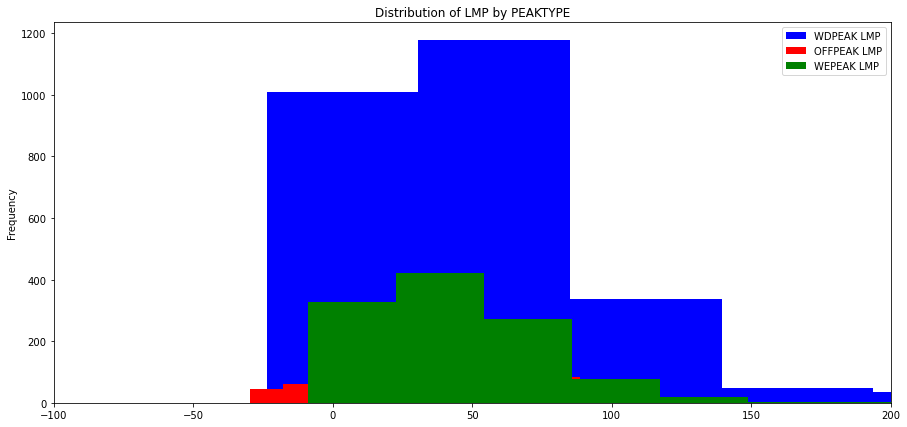

In [199]:
filt1 = df2.loc[df2['PEAKTYPE']=='WDPEAK', 'WAKEWE_ALL..RTLMP.']
filt2 = df2.loc[df2['PEAKTYPE']=='OFFPEAK', 'WAKEWE_ALL..RTLMP.']
filt3 = df2.loc[df2['PEAKTYPE']=='WEPEAK', 'WAKEWE_ALL..RTLMP.']

ax = filt1.plot.hist(figsize=(15,7),bins=100, label = 'WDPEAK LMP', color = 'blue',  title='Distribution of LMP by Node')
ax = filt2.plot.hist(figsize=(15,7),bins=100, label = 'OFFPEAK LMP', color = 'red', title='Distribution of LMP by Node')
ax = filt3.plot.hist(figsize=(15,7),bins=100, label = 'WEPEAK LMP', color = 'green', title='Distribution of LMP by PEAKTYPE')
ax.set_xlim((-100, 200))
ax.legend()

print(filt1.mean())
print(filt2.mean())
print(filt3.mean())

plt.show()

48181.56384288405
39371.46599470712
45589.35795955852


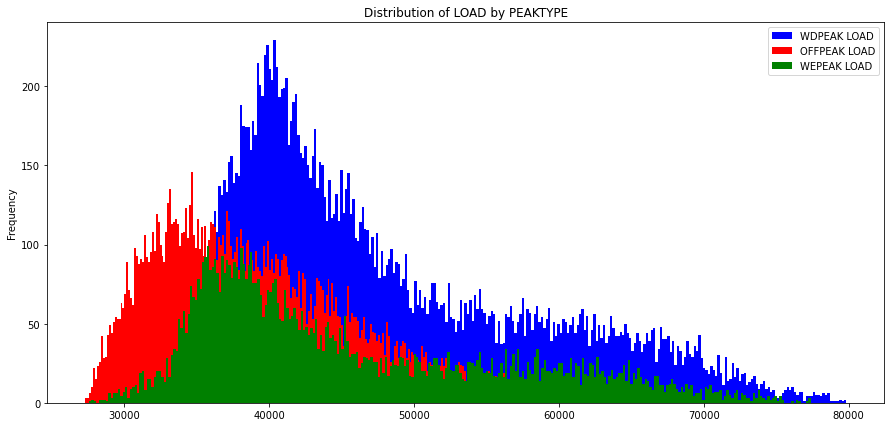

In [166]:
filt1 = df2.loc[df2['PEAKTYPE']=='WDPEAK', 'ERCOT..RTLOAD.']
filt2 = df2.loc[df2['PEAKTYPE']=='OFFPEAK', 'ERCOT..RTLOAD.']
filt3 = df2.loc[df2['PEAKTYPE']=='WEPEAK', 'ERCOT..RTLOAD.']

ax = filt1.plot.hist(figsize=(15,7),bins=300, label = 'WDPEAK LOAD', color = 'blue',  title='Distribution of LMP by Node')
ax = filt2.plot.hist(figsize=(15,7),bins=300, label = 'OFFPEAK LOAD', color = 'red', title='Distribution of LMP by Node')
ax = filt3.plot.hist(figsize=(15,7),bins=300, label = 'WEPEAK LOAD', color = 'green', title='Distribution of LOAD by PEAKTYPE')
#ax.set_xlim((-100, 100))
ax.legend()

print(filt1.mean())
print(filt2.mean())
print(filt3.mean())

plt.show()

### It makes sense to define PEAKTYPE as an ordinal variable with WDPEAK having the highest order, followed by OFFPEAK and WEPEAK respectively

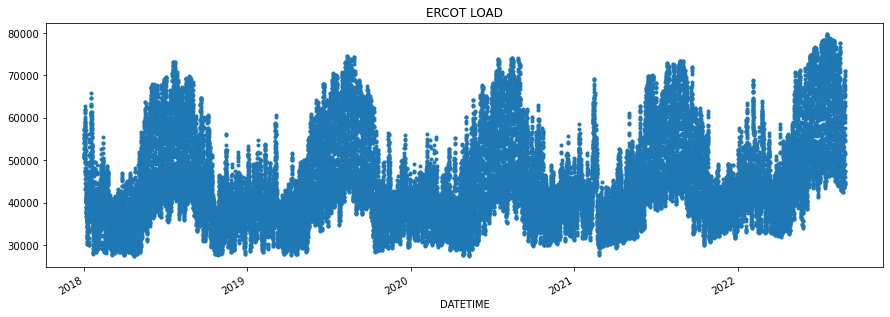

In [64]:
df2['ERCOT..RTLOAD.'].plot(style = '.', figsize = (15,5), title = 'ERCOT LOAD')
plt.show()

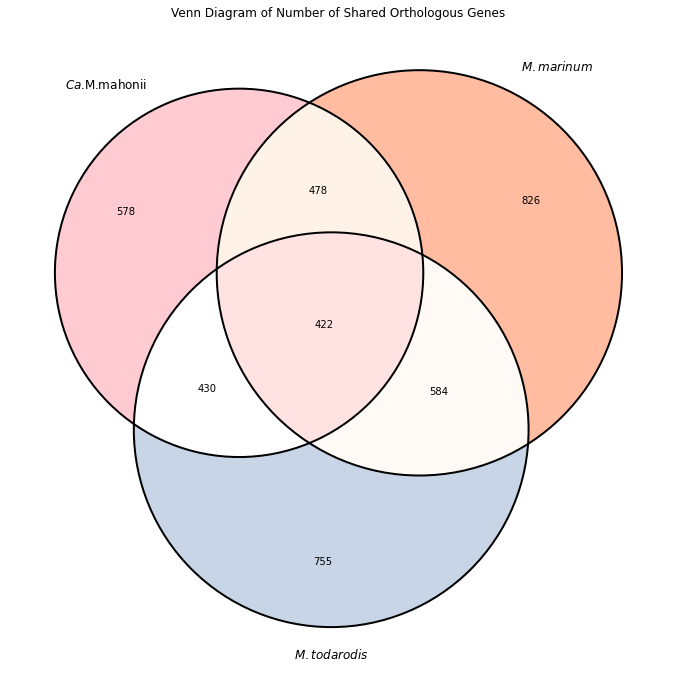

In [48]:
#!pip install matplotlib-venn
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt
  
text = "abc"
# depict venn diagram
venn3(subsets=(578, 826, 478, 755, 430, 584, 422), 
      set_labels=('$\it{Ca}$.M.mahonii', '$\it{M.marinum}$', '$\it{M.todarodis}$'), 
      set_colors=("lightpink", "lightsalmon", "lightsteelblue"), alpha=0.7)
  
# outline of circle line style and width
venn3_circles(subsets=(578, 826, 478, 755, 430, 584, 422),
               linewidth=2)
  
# title of the venn diagram
fig = plt.gcf()
fig.set_size_inches(16,12)
plt.title("Venn Diagram of Number of Shared Orthologous Genes")
plt.show()

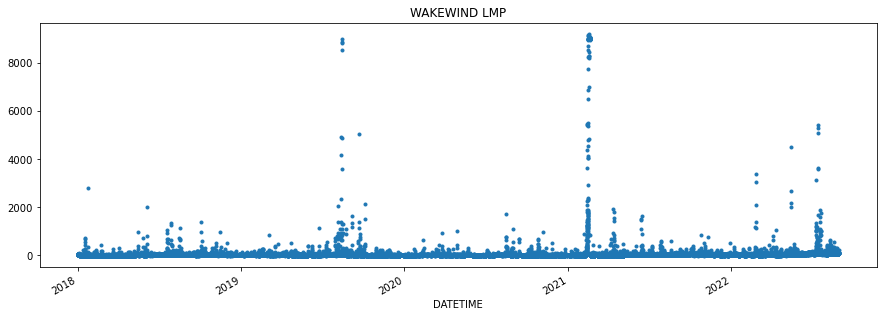

In [168]:
df2['WAKEWE_ALL..RTLMP.'].plot(style = '.', figsize = (15,5), title = 'WAKEWIND LMP')
plt.show()

In [73]:
mlist = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
slist = ['Winter', 'Spring', 'Summer', 'Fall']
sdict = {k: v for v, ks in zip(slist, mlist) for k in ks}
df2['season']=df2.index.month.map(sdict.get)

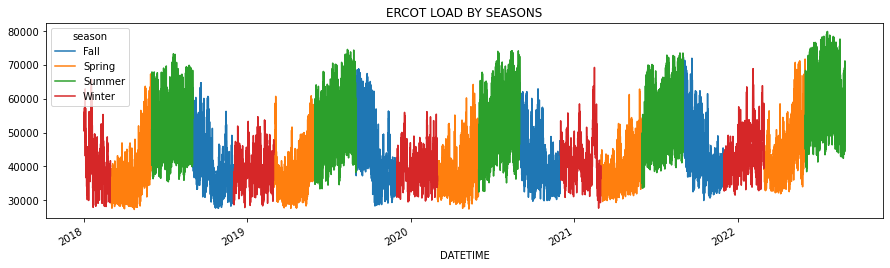

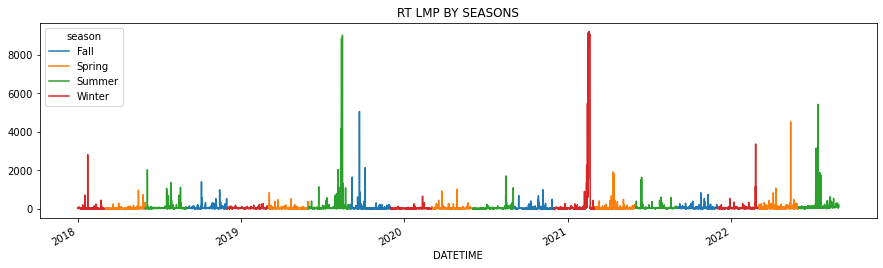

In [74]:
_ = df2.pivot_table(index=df2.index, 
                     columns='season', 
                     values='ERCOT..RTLOAD.',
                     aggfunc='mean').plot(figsize=(15,4),
                     title='ERCOT LOAD BY SEASONS')
_ = df2.pivot_table(index=df2.index, 
                     columns='season', 
                     values='WAKEWE_ALL..RTLMP.',
                     aggfunc='mean').plot(figsize=(15,4),
                     title='RT LMP BY SEASONS')

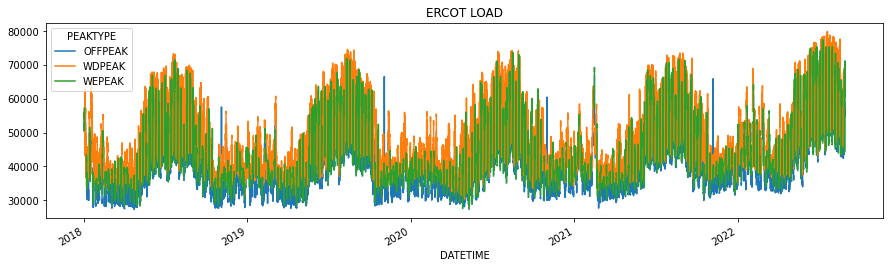

In [205]:
_ = df2.pivot_table(index=df2.index, 
                     columns='PEAKTYPE', 
                     values='ERCOT..RTLOAD.',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='ERCOT LOAD')

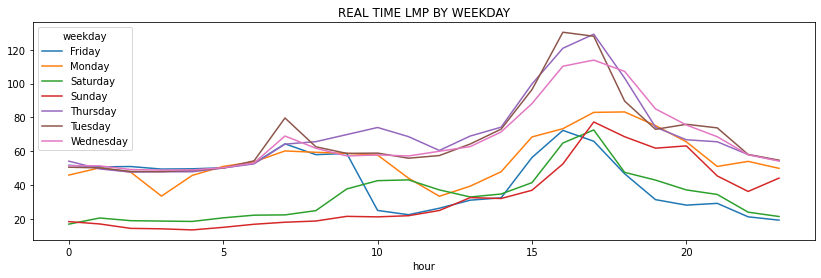

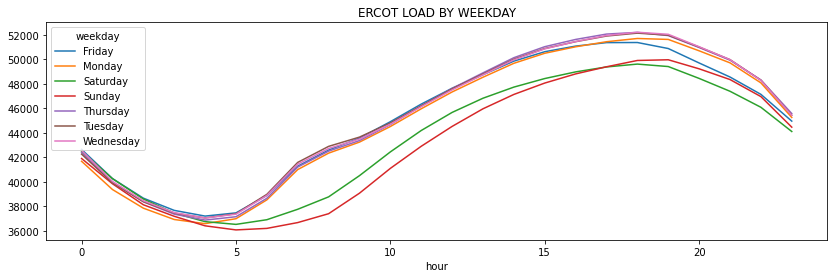

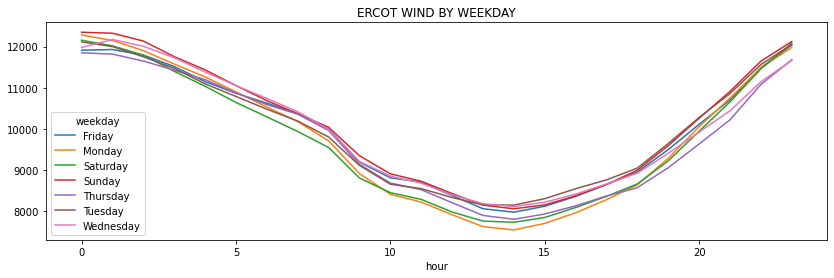

In [163]:
_ = df2.pivot_table(index=df2['hour'], 
                     columns='weekday', 
                     values='WAKEWE_ALL..RTLMP.' ,
                     aggfunc='mean').plot(figsize=(14,4),
                     title='REAL TIME LMP BY WEEKDAY')
_ = df2.pivot_table(index=df2['hour'], 
                     columns='weekday', 
                     values='ERCOT..RTLOAD.',
                     aggfunc='mean').plot(figsize=(14,4), title='ERCOT LOAD BY WEEKDAY')
_ = df2.pivot_table(index=df2['hour'], 
                     columns='weekday', 
                     values='ERCOT..WINDDATA.',
                     aggfunc='mean').plot(figsize=(14,4), title='ERCOT WIND BY WEEKDAY')

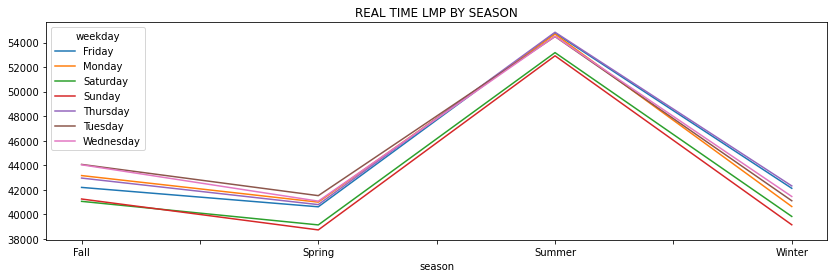

In [75]:
_ = df2.pivot_table(index=df2['season'], 
                     columns='weekday', 
                     values='ERCOT..LOAD_FORECAST.',
                     aggfunc='mean').plot(figsize=(14,4),
                     title='ERCOT LOAD BY SEASON')

<AxesSubplot:title={'center':'ERCOT LOAD BY SEASON'}, xlabel='season'>

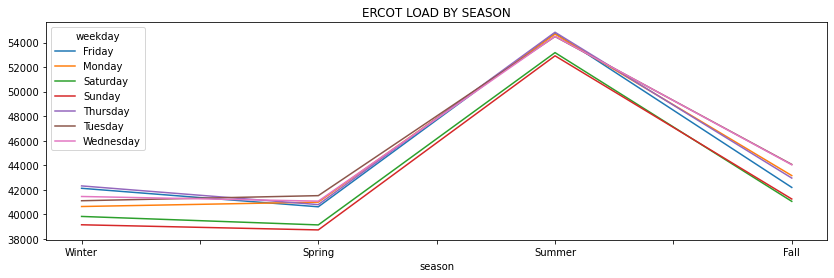

In [80]:
df_ind = df2.pivot_table(index=df2['season'], 
                     columns='weekday', 
                     values='ERCOT..LOAD_FORECAST.',
                     aggfunc='mean')

df_ind = df_ind.loc[['Winter', 'Spring', 'Summer', 'Fall'], :]
df_ind.plot(figsize=(14,4),
                     title='ERCOT LOAD BY SEASON')
plt.show()

In [190]:
df = pd.read_csv('merge_data_2018_2022.csv')
df1 = df.loc[df['YEAR'].isin([2018, 2019, 2020,2021,2022]), ['DATETIME', 'PEAKTYPE', 'ERCOT..RTLOAD.',
                                             'ERCOT..WINDDATA.', 'GR_PANHANDLE..WINDDATA.', 'GR_WEST..WINDDATA.',
                                            'CFLATS_UNIT..RTLMP.', 'HB_NORTH..RTLMP.','WAKEWE_ALL..RTLMP.',
                                             'ERCOT..SOLAR_PVGRPP.', 'ERCOT..LOAD_FORECAST.']]

#Additional Features
df1 = df1.set_index('DATETIME')
df1.index = pd.to_datetime(df1.index)
df1['month'] = df1.index.month_name()
df1['quarter'] = df1.index.quarter
df1['hour'] = df1.index.hour
df1['weekday'] = df1.index.day_name()
df2 = df1.copy()

In [191]:
filt1 = (df2.index>=pd.to_datetime('2022-01-01'))
df2 = df2.loc[filt1]

filt2 = (df2.index<=pd.to_datetime('2022-12-31'))
df2 = df2.loc[filt2]

In [192]:
mlist = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
slist = ['Winter', 'Spring', 'Summer', 'Fall']
sdict = {k: v for v, ks in zip(slist, mlist) for k in ks}
df2['season']=df2.index.month.map(sdict.get)

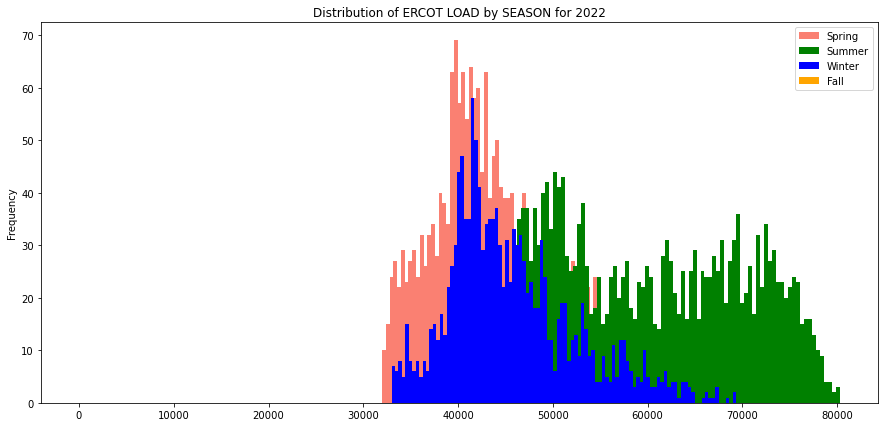

In [193]:

filt1 = df2.loc[df2['season']=='Winter', 'ERCOT..LOAD_FORECAST.']
filt2 = df2.loc[df2['season']=='Spring', 'ERCOT..LOAD_FORECAST.']
filt3 = df2.loc[df2['season']=='Summer', 'ERCOT..LOAD_FORECAST.']
filt4 = df2.loc[df2['season']=='Fall', 'ERCOT..LOAD_FORECAST.']

#"lightpink", "lightsalmon", "lightsteelblue"
ax = filt2.plot.hist(figsize=(15,7),bins=100, label = 'Spring', color = "salmon", title='Distribution of LMP by Node')
ax = filt3.plot.hist(figsize=(15,7),bins=100, label = 'Summer', color = 'green', title='Distribution of LMP by PEAKTYPE')
ax = filt1.plot.hist(figsize=(15,7),bins=100, label = 'Winter', color = "blue",  title='Distribution of LMP by Node')
ax = filt4.plot.hist(figsize=(15,7),bins=100, label = 'Fall', color = "orange", 
                     title='Distribution of ERCOT LOAD by SEASON for 2022')
#ax.set_xlim((-100, 100))
ax.legend()
plt.show()

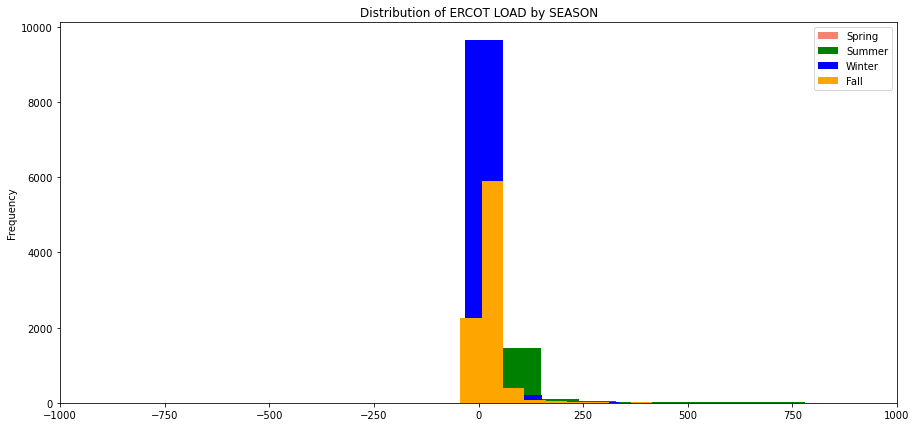

In [158]:

filt1 = df2.loc[df2['season']=='Winter', 'WAKEWE_ALL..RTLMP.']
filt2 = df2.loc[df2['season']=='Spring', 'WAKEWE_ALL..RTLMP.']
filt3 = df2.loc[df2['season']=='Summer', 'WAKEWE_ALL..RTLMP.']
filt4 = df2.loc[df2['season']=='Fall', 'WAKEWE_ALL..RTLMP.']

#"lightpink", "lightsalmon", "lightsteelblue"
ax = filt2.plot.hist(figsize=(15,7),bins=100, label = 'Spring', color = "salmon", title='Distribution of LMP by Node')
ax = filt3.plot.hist(figsize=(15,7),bins=100, label = 'Summer', color = 'green', title='Distribution of LMP by PEAKTYPE')
ax = filt1.plot.hist(figsize=(15,7),bins=100, label = 'Winter', color = "blue",  title='Distribution of LMP by Node')
ax = filt4.plot.hist(figsize=(15,7),bins=100, label = 'Fall', color = "orange", 
                     title='Distribution of ERCOT LOAD by SEASON')
ax.set_xlim((-1000, 1000))
ax.legend()
plt.show()

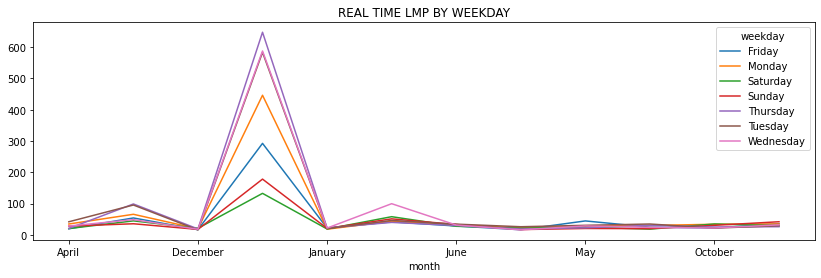

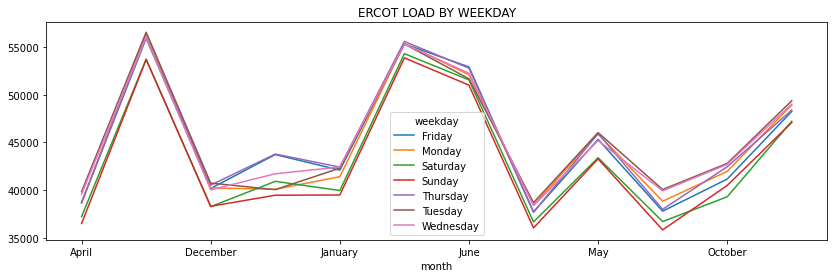

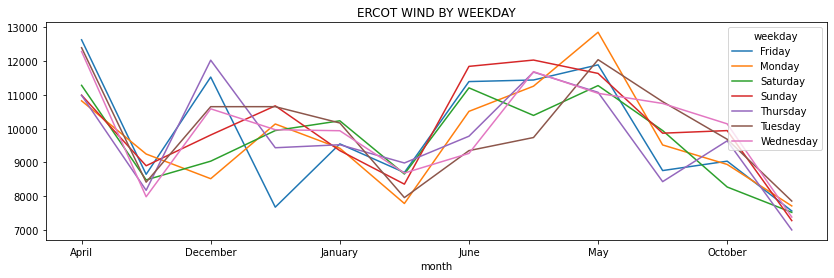

In [207]:
_ = df2.pivot_table(index=df2['month'], 
                     columns='weekday', 
                     values='CFLATS_UNIT..RTLMP.' ,
                     aggfunc='mean').plot(figsize=(14,4),
                     title='REAL TIME LMP BY WEEKDAY')
_ = df2.pivot_table(index=df2['month'], 
                     columns='weekday', 
                     values='ERCOT..RTLOAD.',
                     aggfunc='mean').plot(figsize=(14,4), title='ERCOT LOAD BY WEEKDAY')
_ = df2.pivot_table(index=df2['month'], 
                     columns='weekday', 
                     values='ERCOT..WINDDATA.',
                     aggfunc='mean').plot(figsize=(14,4), title='ERCOT WIND BY WEEKDAY')

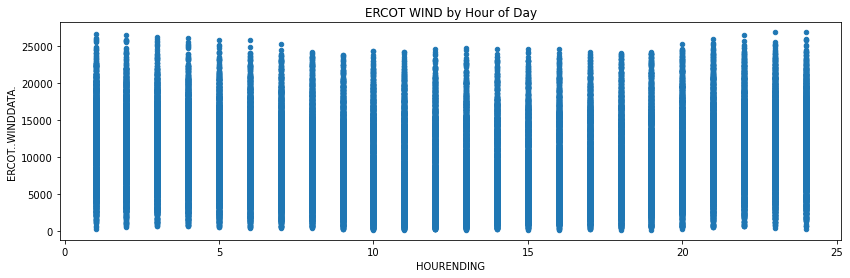

In [124]:
_ = df[['ERCOT..WINDDATA.','HOURENDING']].plot(x='HOURENDING',
                                     y='ERCOT..WINDDATA.',
                                     kind='scatter',
                                     figsize=(14,4),
                                     title='ERCOT WIND by Hour of Day')

## Correlation Coefficient

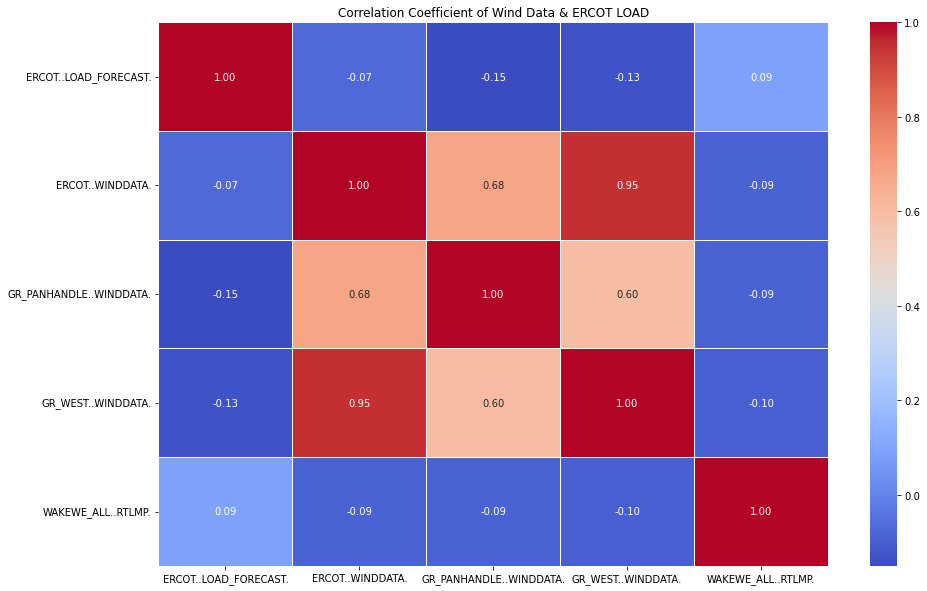

In [159]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
corr = df2[['ERCOT..LOAD_FORECAST.','ERCOT..WINDDATA.', 'GR_PANHANDLE..WINDDATA.', 'GR_WEST..WINDDATA.', 
            'WAKEWE_ALL..RTLMP.']].corr()
sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f', linewidths=.5)
plt.title('Correlation Coefficient of Wind Data & ERCOT LOAD')
plt.show()

### ERCOT WINDDATA, PANDLE WINDDATA, and GR WEST WINDDATA appear all to be highly correlated and distributed the same, we might suffice to only use ERCOT WINDDATA,

## Missing Data

In [118]:
date_range = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='H')
missing_timeseries = df2.index[~df2.index.isin(date_range)]
missing_timeseries

DatetimeIndex([], dtype='datetime64[ns]', name='DATETIME', freq=None)

## Trend Seasonality Decomposition

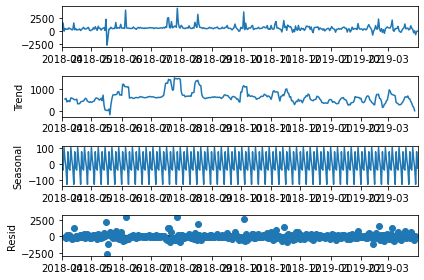

In [119]:
aa = df2.resample(rule='D').sum()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(aa[['CFLATS_UNIT..RTLMP.']], model ='additive')

fig = decomposition.plot()
plt.show()

## Augumented Dickey Fuller Test for Stationarity

In [120]:
from statsmodels.tsa.stattools import adfuller as ADF

series = df2['CFLATS_UNIT..RTLMP.'] # ADF takes series, not DF

result = ADF(series)

print('ADF Statistic: ', result[0])
print('P-value: {:.20f}'.format(result[1]))

ADF Statistic:  -14.367432058622072
P-value: 0.00000000000000000000


## Berush Pagan Test for Heteroskedacity

In [121]:
from statsmodels.stats.diagnostic import het_breuschpagan as BP
import statsmodels.api as sm
from statsmodels.formula.api import ols

bp_data = df2[['CFLATS_UNIT..RTLMP.']].copy()
bp_data['LMP'] = bp_data['CFLATS_UNIT..RTLMP.']
bp_data['Time_Period'] = range(1, len(bp_data)+1) # Convert time series points into consecutive ints

formula = 'LMP ~ Time_Period' # ie CFLATS_UNIT..RTLMP. depends on Time Period (OLS auto adds Y intercept)

# Next we apply Ordinary Linear Square baseline regression model - as baseline test
model = ols(formula, bp_data).fit()

result = BP(model.resid, model.model.exog)

print('BP Statistic: ', result[0])
print('P-value: {:.20f}'.format(result[1]))

BP Statistic:  3.88873310578101
P-value: 0.04861107964434150525


## Train Test Split & Model Training

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import meanabs

# Equivalent to R's Auto ARIMA to get the optimal parameters
#import pmdarima as pm
#model = pm.auto_arima(htrain, seasonal=True, stationary=True, stepwise=True, trace=True, suppress_warnings=True)

df = pd.read_csv('merge_data_2018_2022.csv', parse_dates=['DATETIME'])
df['date'] = df['DATETIME'].dt.date
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
filt1 = (df.index>=pd.to_datetime('2018-04-1'))
df2 = df.loc[filt1]

filt2 = (df2.index<=pd.to_datetime('2019-03-31'))
df2 = df2.loc[filt2]


# First we split it up between train and test
htrain = htrain = df2['CFLATS_UNIT..RTLMP.']
 

filt1 = (df.index>=pd.to_datetime('2019-03-1'))
df_test = df.loc[filt1]

filt2 = (df_test.index<=pd.to_datetime('2019-04-30'))
df_test = df_test.loc[filt2] 
htest = df_test['CFLATS_UNIT..RTLMP.'] # SARIMAX takes series, not DF

# Next define hyperparameters. Default is AR model (1,0,0)(0,0,0,0)
p = 1 # AR order
d = 0 # I degree
q = 1 # MA window
P = 0 # AR seasonal order
D = 0 # I seasonal order
Q = 0 # MA seasonal order
m = 0 # Seasonality period length


model = SARIMAX(
    htrain,
    order=(p, d, q),
    seasonal_order=(P, D, Q, m)
    ,enforce_stationarity=False
    ,enforce_invertibility=False
).fit(
    maxiter=50 # Default is 50
)

results = model.get_prediction(start='2019-04-01', end='2019-04-30', dynamic=False)
SARIMA_prediction_CI = results.conf_int(alpha=(1-0.8)) # 80% CI
SARIMA_prediction = results.predicted_mean
SARIMA_prediction = SARIMA_prediction.to_frame().rename(columns={0: 'PJME_MW'})

# Evaluate it's performance using Mean Absolute Error (MAE)
print("Finished training and predicting. MAE SARIMA: {:.20f}. AIC: {}. Parameters: p,d,q,P,D,Q,m: ".format(meanabs(htest, SARIMA_prediction['PJME_MW']), model.aic), p,d,q,P,D,Q,m)

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                    CFLATS_UNIT..RTLMP.   No. Observations:                 8760
Model:             SARIMAX(1, 0, 1)x(0, 1, [1, 2], 6)   Log Likelihood              -45867.759
Date:                                Wed, 14 Sep 2022   AIC                          91745.518
Time:                                        12:02:25   BIC                          91780.896
Sample:                                             0   HQIC                         91757.574
                                               - 8760                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5201      0.004    127.859      0.000       0.512       0.528
ma.L1          0.1723      0.005     33.459      0.000       0.162       0.182
ma.S.L6       -1.0080      0.019    -52.267      0.000      -1.046      -0.970
ma.S.L12       0.0011      0.019      0.057      0.954      -0.037       0.039
sigma2      2083.8770      6.354    327.950      0.000    2071.423    2096.331
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):          47701134.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            12.66
Prob(H) (two-sided):                  0.00   Kurtosis:                       364.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
heatmap_data = df.copy()

# First we need to add weekdays as a column
heatmap_data['Hour'] = df.index.hour

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Hour']).mean()

# Reset index 
heatmap_data = heatmap_data.reset_index()



# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Hour', values='ERCOT..LOAD_FORECAST.')

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd',
            cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Hour of Day for ERCOT LOAD_FORCAST')

heatmap_data2 = df.copy()
heatmap_data2['Hour'] = df.index.hour

# Next we add the year as column and group the data up to annual day of week level
heatmap_data2['Year'] =  df.index.year
heatmap_data2 = heatmap_data2.groupby(['Year', 'Hour']).mean()

# Reset index 
heatmap_data2 = heatmap_data2.reset_index()



# Pivot it to a uniform data format for heatmaps
heatmap_data2 = heatmap_data2.pivot(index='Year', columns='Hour', values='HB_NORTH..RTLMP.')

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(heatmap_data2, linewidths=.5, cmap='YlOrRd',
            cbar=True, cbar_kws={"format": '%1.0f $/MWh'}).set_title('Heatmap - by Hour of Day for HB_NORTH..RTLMP.')


plt.show()

In [ ]:
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
heatmap_data = df.copy()


# First we need to add weekdays as a column
heatmap_data['Weekday_Name'] = df.index.day_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Weekday_Name']).mean()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# We drop off 2018 because it's not a full year
heatmap_data = heatmap_data[heatmap_data['Year'] != 2018]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Weekday_Name', values='HB_NORTH..RTLMP.')

# Reorder columns
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('Heatmap - by Day of Week')
plt.show()

In [110]:
df = pd.read_csv('merge_data_2018_2022.csv')
df.sort_index()
df = df.groupby(df.index).first()
df = df.asfreq('H')
df.index


DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='H')

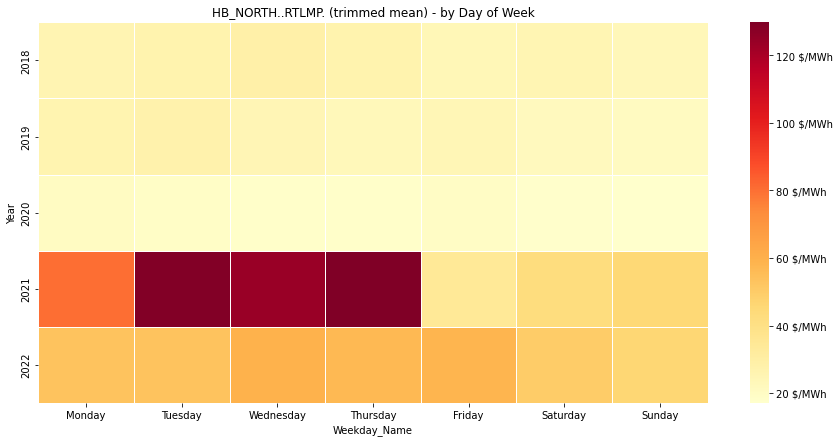

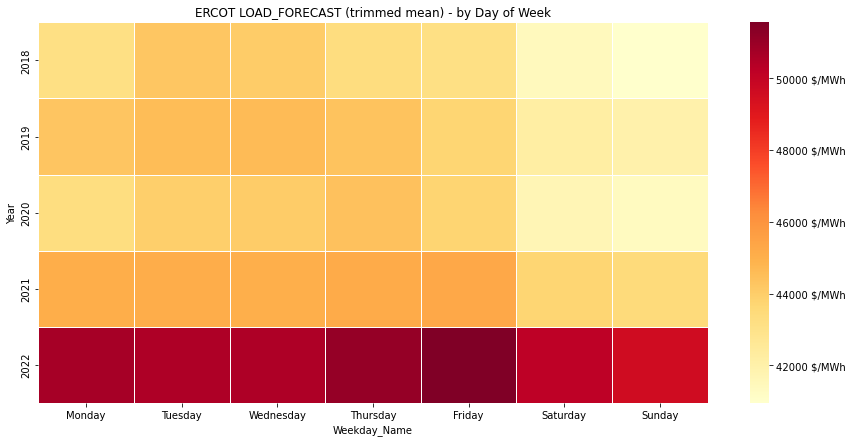

In [53]:
df = pd.read_csv('merge_data_2018_2022.csv')
from scipy import stats
#import pandas as pd
#stats.trim_mean(data, 0.1)
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
heatmap_data = df[['HB_NORTH..RTLMP.']].copy()


# First we need to add weekdays as a column
heatmap_data['Weekday_Name'] = df.index.day_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data=heatmap_data.groupby(['Year', 'Weekday_Name']).apply(lambda x: stats.trim_mean(x, 0.01)[0])
heatmap_data = heatmap_data.reset_index()
heatmap_data['HB_NORTH..RTLMP.'] = heatmap_data[0]
# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Weekday_Name', values='HB_NORTH..RTLMP.')

# Reorder columns
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('HB_NORTH..RTLMP. (trimmed mean) - by Day of Week')


heatmap_data2 = df[['ERCOT..LOAD_FORECAST.']].copy()
# First we need to add weekdays as a column
heatmap_data2['Weekday_Name'] = df.index.day_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data2['Year'] =  df.index.year
heatmap_data2=heatmap_data2.groupby(['Year', 'Weekday_Name']).apply(lambda x: stats.trim_mean(x, 0.01)[0])
heatmap_data2 = heatmap_data2.reset_index()
heatmap_data2['ERCOT..LOAD_FORECAST.'] = heatmap_data2[0]
# Pivot it to a uniform data format for heatmaps
heatmap_data2 = heatmap_data2.pivot(index='Year', columns='Weekday_Name', values='ERCOT..LOAD_FORECAST.')

# Reorder columns
heatmap_data2 = heatmap_data2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(heatmap_data2, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('ERCOT LOAD_FORECAST (trimmed mean) - by Day of Week')
plt.show()

In [ ]:
df = pd.read_csv('merge_data_2018_2022.csv')
from scipy import stats
#stats.trim_mean(data, 0.1)
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
heatmap_data = df[['HB_NORTH..RTLMP.']].copy()


# First we need to add weekdays as a column
heatmap_data['Hour'] = df.index.hour

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  df.index.year
heatmap_data=heatmap_data.groupby(['Year', 'Hour']).apply(lambda x: stats.trim_mean(x, 0.01)[0])
heatmap_data = heatmap_data.reset_index()
heatmap_data['HB_NORTH..RTLMP.'] = heatmap_data[0]
# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Hour', values='HB_NORTH..RTLMP.')


fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f $/MWh'}).set_title('Heatmap (trimmed mean) - of Hour')
plt.show()